# Introduction :

The data set I Chose is Tips dataset

Here some Notes and comments about this datasets: This data set contains information about more then 240 people collected from the Resturent database, Including 'total bill', 'tips', 'size', 'gender' .

# Questions about this dataset :

1. Is top paid Bill give top tips ?
2. Who give maximum ammout of tips male or female ?
3. How many people smoke in the Resturent ?
4. In which day of week maximum number of customer visit resturent ?

# Module using for this project :

For this project I use four module, There are :
1. Pandas
2. Numpy
3. Matplotlib
4. Seaborn

In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as ppl
import seaborn as sb

# Data reading and Cleaning:

It is necessary to read data carefully to know about the data types, data stracture and it is also necessary to clean data to get accurate report. So I did delete duplicate data, unuseful columns etc.

In [2]:
# Importing and reading dataframe
data = pd.read_csv("tips.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Check the shape of dataframe
data.shape

(244, 7)

In [4]:
# Check the data size
data.size

1708

In [5]:
# Count Null Value
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In this dataframe there are no Null value so It is not required to fill or drop data

In [6]:
# Viewing Columns
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
# Checking data types
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [8]:
# Check each columns with unique values
data.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [9]:
# Statistic value for this data
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [11]:
# Checking for Duplicate 
data.duplicated().sum()

1

In [12]:
# Drop duplicate 
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

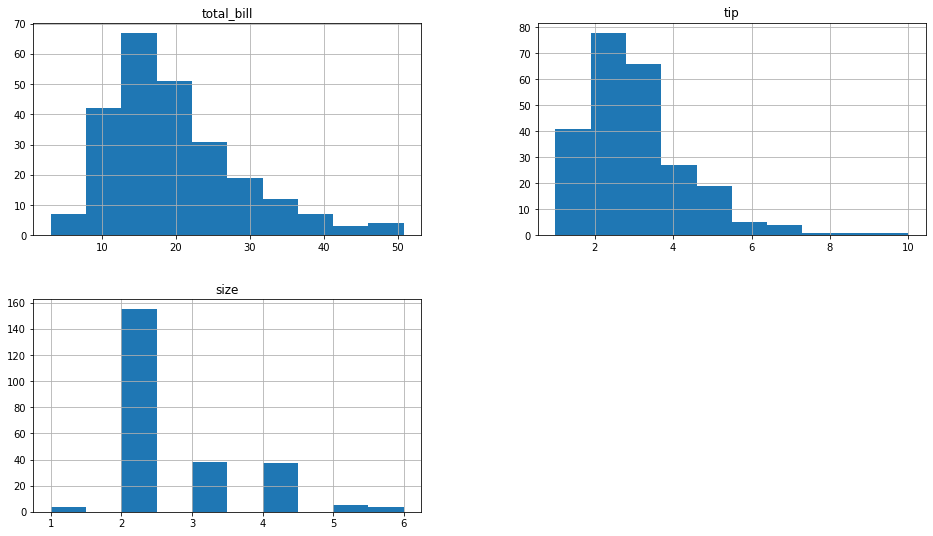

In [13]:
# Visualize each variables
data.hist(figsize=(16,9))
ppl.show()

## Visualize Data :

##### Question no 1. Is top paid Bill give top tips ? 

c:\users\subham\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\subham\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'RELATION BETWEEN TOTAL BILL AND TOTAL TIPS')

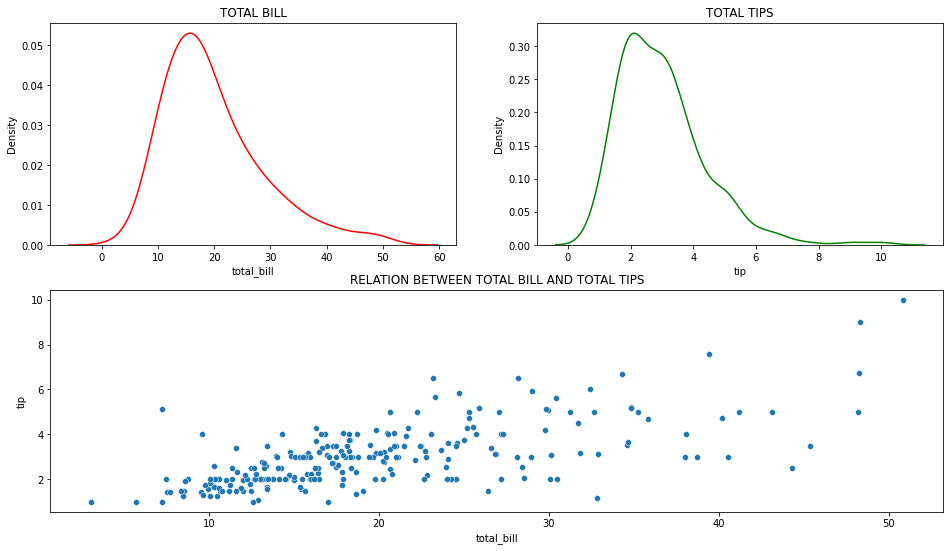

In [14]:
ppl.figure(figsize=(16,9))
ppl.subplot(2,2,1)
sb.distplot(data["total_bill"], hist=False, color="r")
ppl.title("TOTAL BILL")
ppl.subplot(2,2,2)
sb.distplot(data["tip"], hist=False,color="g")
ppl.title("TOTAL TIPS")
ppl.subplot(2,1,2)
sb.scatterplot(x = "total_bill", y = "tip",data=data)
ppl.title("RELATION BETWEEN TOTAL BILL AND TOTAL TIPS")

CONCLUSION for Question no 1 is people who paid top bill are most of them giving top tips

##### Question no 2. Who give maximum ammout of tips male or female ?

In [15]:
data.groupby(by=["sex"]).sum()

,total_bill,tip,size
sex,,,
Female,1557.95,244.51,212
Male,3256.82,485.07,413


In [55]:
df1=data[data.sex == "Female"].tip.value_counts().mean()
df1

1.7551020408163265

In [56]:
df2=data[data.sex == "Male"].tip.value_counts().mean()
df2

1.7444444444444445

<AxesSubplot:xlabel='sex', ylabel='tip'>

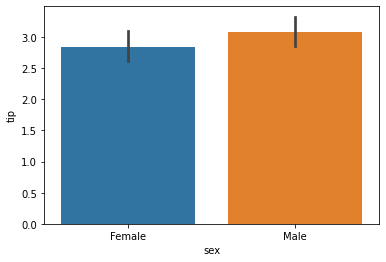

In [58]:
sb.barplot(x="sex", y="tip",data=data)

In [60]:
icrease_percentage = (df1-df2)/df1*100
icrease_percentage

0.6072351421188591

conclusion question no 2. Male paid 0.6 % maximum tip in Resturent then Female

##### Question no 3. How many people smoke in the Resturent ?

In [74]:
data.groupby(by=["smoker"]).sum()

,total_bill,tip,size
smoker,,,
No,2897.43,451.77,403
Yes,1917.34,277.81,222


<AxesSubplot:xlabel='smoker', ylabel='size'>

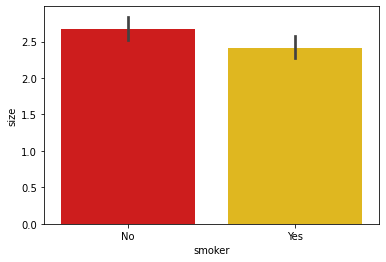

In [87]:
sb.barplot(x ="smoker", y="size", data=data,palette="hot")

In [78]:
smoker=data[data.smoker == 'Yes'].size.mean()
smoker

644.0

In [79]:
non_smoker = data[data.smoker == 'No'].size.mean()
non_smoker

1057.0

In [81]:
percentage_of_smoker = (non_smoker - smoker)/non_smoker*100
percentage_of_smoker

39.0728476821192

conclusion question no 3.  More then 39% of People smoking in Resturent and upto 60 % people non smoker

##### Question no 4. In which day of week maximum number of customer visit resturent ?

Text(0, 0.5, 'SIZE')

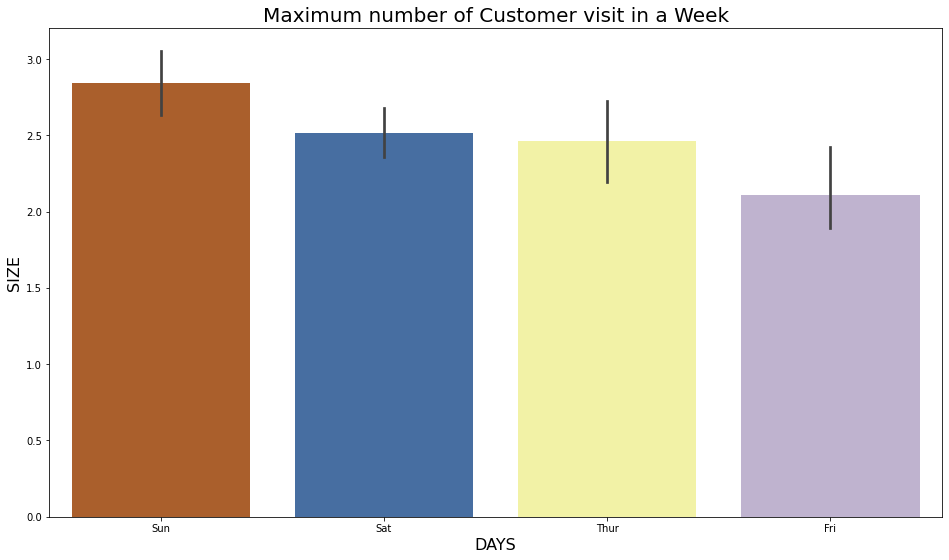

In [95]:
ppl.figure(figsize=(16,9))
sb.barplot(x='day',y='size',data=data,palette="Accent_r")
ppl.title("Maximum number of Customer visit in a Week", fontsize =20)
ppl.xlabel("DAYS", fontsize =16)
ppl.ylabel("SIZE", fontsize = 16)

conclusion question no 4. From above Report we can easily understand maximum number of people go resturent in 'Sunday' / 'Weekend' 